In [9]:
!unzip '/content/drive/MyDrive/월간데이터7/data.zip'

Archive:  /content/drive/MyDrive/월간데이터7/data.zip
replace submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: submission.csv          
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import cv2
import os
from random import *
import time
import copy

# 데이터 로드하기

train.shape : (2048, 787)

test.shape : (20480, 786)

digit : 0~9(10개)

letter : A~Z(26개)

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

print(train.shape)
train.head(10)

(2048, 787)


,id,digit,letter,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,4,4,3,0,4,3,3,3,4,4,0,0,1,1,3,4,0,4,2,0,4,0,1,3,1,0,4,1,1,3,...,4,3,4,1,3,0,0,1,3,3,3,0,3,2,2,1,0,1,0,0,3,0,0,4,2,0,3,4,1,1,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,1,4,2,0,3,4,0,0,2,3,4,0,3,4,3,0,2,2,1,4,2,3,3,4,1,2,4,2,0,3,...,4,2,3,0,0,0,0,4,3,2,2,4,2,1,1,1,3,3,1,2,4,4,4,2,2,4,4,0,4,2,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,0,2,1,3,2,2,2,4,1,1,4,1,0,1,3,4,2,2,2,4,1,1,2,0,3,0,2,3,4,0,...,3,0,4,0,3,0,2,0,1,4,2,3,4,4,4,0,2,0,4,4,1,3,0,3,2,0,2,3,0,2,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,3,4,3,1,0,3,2,2,0,3,4,1,0,4,1,2,2,3,2,2,0,2,0,3,0,3,2,4,0,0,...,0,3,0,1,4,1,3,1,2,1,1,1,2,2,2,4,3,4,3,0,4,1,2,4,1,4,0,1,0,4,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,4,2,4,2,1,4,1,1,4,4,0,2,3,4,4,3,3,3,3,4,1,0,3,0,3,0,0,0,1,1,...,2,1,3,2,1,4,2,3,2,2,1,0,4,2,2,1,2,1,0,3,2,2,2,2,1,4,2,1,2,1,4,4,3,2,1,3,4,3,1,2
5,6,8,C,4,3,0,3,3,4,3,3,4,3,4,1,3,4,2,3,3,2,2,4,0,2,4,0,2,4,3,2,4,0,0,3,3,1,2,0,1,...,1,2,3,0,1,0,4,1,3,0,1,3,1,1,2,3,4,2,3,4,1,3,1,0,4,3,2,0,2,3,4,3,0,4,4,4,2,2,3,4
6,7,1,Q,0,0,4,2,4,0,4,3,0,4,3,3,2,1,4,4,0,4,1,4,0,1,0,1,4,1,1,1,4,4,1,0,4,2,0,2,4,...,0,2,2,1,2,1,1,1,1,3,4,4,2,0,4,1,0,1,3,0,4,4,1,4,3,4,2,3,0,3,4,3,2,0,4,4,4,3,1,3
7,8,3,M,1,0,3,4,4,0,2,4,2,0,3,2,2,3,4,0,4,0,3,1,2,2,3,4,2,4,3,2,0,4,4,2,1,4,4,3,1,...,4,4,0,1,1,2,2,4,0,2,4,0,4,2,0,2,2,3,0,3,2,0,3,2,3,1,4,4,0,4,2,0,4,4,4,0,2,2,3,1
8,9,6,F,0,1,0,4,0,1,2,2,0,3,0,1,1,1,3,0,0,1,1,1,4,2,4,3,1,0,4,3,4,2,3,2,0,0,3,2,4,...,1,4,4,3,2,1,4,4,2,3,0,0,0,2,2,2,0,0,2,0,3,0,2,3,3,0,1,0,2,0,3,2,4,4,4,1,0,1,3,3
9,10,8,J,4,3,4,0,0,0,4,4,2,3,4,4,0,4,0,2,1,1,2,3,0,2,0,4,3,2,4,2,0,4,3,3,2,1,1,1,0,...,2,1,2,1,3,4,2,4,0,1,1,0,4,1,4,2,4,1,4,3,4,2,3,4,4,3,1,2,2,1,2,0,0,1,3,0,3,3,1,2


## train, test 숫자별로 폴더에 저장하기

In [44]:
def make_folder(directory_path):
    if not os.path.isdir(directory_path): #경로에 해당하는 디렉토리가 없으면 
        os.mkdir(directory_path) #폴더 생성할 때 사용하는 함수

#os.getcwd() : 현재 작업 디렉토리 반환 지금은 /content
path_train = os.path.join(os.getcwd(), 'train') #경로를 병합해서 새 경로 생성하기
path_val = os.path.join(os.getcwd(), 'val')
path_test = os.path.join(os.getcwd(), 'test')

make_folder(path_train)
make_folder(path_val)
make_folder(path_test)

for i in range(10):
    path_train_digit = os.path.join(path_train, str(i)) #0~9까지 경로
    path_val_digit = os.path.join(path_val, str(i))
    make_folder(path_train_digit) # train 폴더 안에 숫자별 폴더 만들기
    make_folder(path_val_digit)

for i in range(len(train)):
    digit = train.loc[i, 'digit']
    letter = train.loc[i, 'letter']
    img = train.loc[i, '0':].values.reshape(28,28).astype(int)

    path_train_digit = os.path.join(path_train, str(digit)) # 현재 이미지의 숫자에 맞는 경로
    path_val_digit = os.path.join(path_val, str(digit))

    if digit==0:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i, letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4) # 0.2만큼 validation set 만들어주려고 설정한 듯?..
        #randint(시작, n-1) 중 랜덤숫자 1개 뽑아내기
        if ran_num == 0:
            cv2.imwrite(path_val_image, img)
        else : 
            cv2.imwrite(path_train_image, img)

    elif digit == 1:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)
            
    elif digit == 2:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 3:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 4:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 5:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        cv2.imwrite(path_train_image, img)

    elif digit == 6:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 7:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 8:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

    elif digit == 9:
        path_train_image = os.path.join(path_train_digit, '%d_%c.jpg'%(i,letter))
        path_val_image = os.path.join(path_val_digit, '%d_%c.jpg'%(i, letter))
        ran_num = randint(0,4)
        if ran_num ==0:
            cv2.imwrite(path_val_image, img)
        else:
            cv2.imwrite(path_train_image, img)

for i in range(len(test)):
    letter = test.loc[i, 'letter']
    img = test.loc[i, '0':].values.reshape(28,28).astype(int)
    path_test_digit = os.path.join(path_test, '%d_%c.jpg'%(i, letter))
    cv2.imwrite(path_test_digit, img)


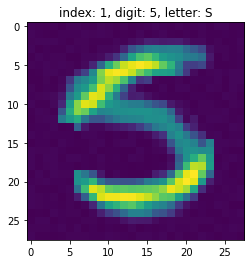

In [45]:
plt.title('index: %i, digit: %s, letter: %s'%(1, digit, letter))
plt.imshow(img)
plt.show()

## 이미지 augmentation

In [46]:
img_size = 64
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize([img_size, img_size]),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(), #데이터 타입을 tensor로 변경
        transforms.Normalize([0.5],[0.5])
        #이미지의 경우 픽셀 값이 0~255의 값을 가지는데, ToTensor로 0~1사이의 값으로 바뀜
        #normalize시 -1~1사이의 값으로 normalize 됨

        # ToTensor ==> scaling
        # Normalize ==> centerizing+rescaling
    ]),
    'val':transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size, img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5],[0.5])
    ])
}

image folder 관련 설명 

: https://ndb796.tistory.com/373

In [47]:
data_dir = os.path.join(os.getcwd())
#ImageFolder라이브러리 == 계층적인 폴더 구조를 가지고 있는 데이터셋을 불러올 때 사용.
image_datasets = {x:datasets.ImageFolder(os.path.join(data_dir, x),
                                         data_transforms[x]) for x in ['train', 'val']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20, shuffle=True, num_workers=20) for x in ['train', 'val']}
dataset_sizes = {x:len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

print(dataset_sizes, class_names)


{'train': 1974, 'val': 652} ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## Model

In [48]:
#GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [49]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()

        self.layer1 = self.conv_module(1, 16)
        self.layer3 = self.conv_module(16, 32)
        self.layer4 = self.conv_module(32, 64)
        self.layer5 = self.conv_module(64, 128)
        self.layer6 = self.conv_module(128,256)
        self.gap = self.global_avg_pool(256, 10)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.gap(out)
        out = out.view(-1, 10)

        return out

    def conv_module(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1))

    def global_avg_pool(self, in_num, out_num):
        return nn.Sequential(
            nn.Conv2d(in_num, out_num, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_num),
            nn.LeakyReLU(),
            nn.AdaptiveAvgPool2d((1, 1)))

In [50]:
model = CustomCNN()
model = model.to(device)
print(model)

CustomCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): MaxPool2d(kernel_size=3, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (layer5): Sequential(
    (0): Conv2d(64

learning_scheduler 

: https://sanghyu.tistory.com/113

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
exp_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer_ft, factor=0.1,patience=5)

#ReducdLROnPlateau (optimizer, factor(감소시킬 비율), patience(metric이 향상 안 될 때, 몇 epoch를 참을것인가?))
# : 성능이 향상이 없을 때 learning rate를 감소시킨다.  그렇기 때문에 validation loss나 metric을 learning rate step 함수의 input으로 넣어주어야 한다.
# 그래서 metric이 향상되지 않을 때, patience횟수(epoch)만큼 참고 그 이후에는 learning rate를 줄인다. 
# optimizer에 momentum을 설정해야 사용가능

In [52]:

def train_model(model, criterion, optimizer, scheduler, num_epochs=8):
    global_info=[]
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict()) #deepcopy 내부에 객체들까지 새롭게 copy 되는 것
    best_acc = 0.0
    early_stopping = EarlyStopping(patience=11, verbose=True)
    for epoch in range(num_epochs):
        local_info = []
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':

                model.train()  # Set model to training mode
            else:

                model.eval()   # Set model to evaluate mode
                if epoch >0:
                    scheduler.step(val_loss)
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            if phase == 'val':
                val_loss = running_loss / dataset_sizes['val']
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            #(Variable(x).data).cpu().numpy()
            if phase == 'train':
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)
            else:
                local_info.append(epoch_loss)
                ea = epoch_acc.cpu().numpy()
                local_info.append(ea)



            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))


            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        lr_get = get_lr(optimizer)
        print("Current learning rate : {:.8f}".format(lr_get))
        global_info.append(local_info)
        if phase =='val':
            early_stopping(epoch_loss, model)

            if early_stopping.early_stop:
                print("Early stopping")
                break

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
    
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss


In [53]:
model = train_model(model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=100)

Epoch 0/99
----------
train Loss: 2.2542 Acc: 0.1788
val Loss: 2.2624 Acc: 0.1779
Current learning rate : 0.00300000
Validation loss decreased (inf --> 2.262434).  Saving model ...
Epoch 1/99
----------
train Loss: 2.2062 Acc: 0.2330
val Loss: 2.1642 Acc: 0.2623
Current learning rate : 0.00300000
Validation loss decreased (2.262434 --> 2.164191).  Saving model ...
Epoch 2/99
----------
train Loss: 2.1862 Acc: 0.2609
val Loss: 2.1690 Acc: 0.2331
Current learning rate : 0.00300000
EarlyStopping counter: 1 out of 11
Epoch 3/99
----------
train Loss: 2.1716 Acc: 0.2720
val Loss: 2.1487 Acc: 0.2546
Current learning rate : 0.00300000
Validation loss decreased (2.164191 --> 2.148703).  Saving model ...
Epoch 4/99
----------
train Loss: 2.1556 Acc: 0.2741
val Loss: 2.1374 Acc: 0.2347
Current learning rate : 0.00300000
Validation loss decreased (2.148703 --> 2.137373).  Saving model ...
Epoch 5/99
----------
train Loss: 2.1420 Acc: 0.2852
val Loss: 2.1448 Acc: 0.1871
Current learning rate : 0.0

In [56]:
torch.save(model, './CustomCNN_model.pth')

In [59]:
import natsort as nt
from PIL import Image
from torch.autograd import Variable 
def test_model():
    data_transforms = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),
        transforms.Resize([img_size,img_size]),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])
    ])
    model_ft = torch.load('./CustomCNN_model.pth', map_location=device)
    
    path_test = os.path.join(os.getcwd(), 'test')
    image_list = nt.natsorted(os.listdir(path_test))
    output_list = []
    for i, images in enumerate(image_list):
        path_test_image = os.path.join(path_test, images)
        image = Image.open(path_test_image)
        image = data_transforms(image)
        image.unsqueeze_(dim=0)
        image = Variable(image)
        image = image.cuda(device)
        torch.no_grad()
        output = model(image)
        #print(output)
        output = torch.argmax(output, dim=1)
        
        output_list.append(output)
        
    return output_list
output = test_model()



In [65]:
submission = pd.read_csv('./submission.csv')

submission.digit = torch.cat(output).detach().cpu().numpy()
print(submission)
submission.to_csv('./CustomCNN_result.csv', index=False)

          id  digit
0       2049      3
1       2050      9
2       2051      4
3       2052      0
4       2053      3
...      ...    ...
20475  22524      4
20476  22525      1
20477  22526      6
20478  22527      1
20479  22528      0

[20480 rows x 2 columns]
